# Cats vs Dogs Classification using Convolutional Neural Networks

In [1]:
import numpy as np # for mathematical operations  
import matplotlib.pyplot as plt 
import os # opening directories i
import cv2 # cv2 is "OpenCV" used to work with images and videos
from tqdm import tqdm

# First Section: Loading the Data

### Our model will be classifying cat and dog images, so first we need to prepare the data
* Cats vs Dogs Dataset: https://www.microsoft.com/en-us/download/details.aspx?id=54765

*Reference: https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/*

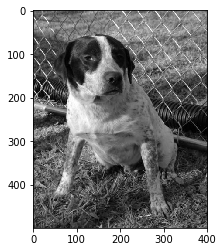

In [2]:
DATADIR = "/Users/Layan/Desktop/CNN_Tutorial/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[ 94  90  88 ... 104 110 118]
 [ 96  93  91 ... 104 115 121]
 [ 96  95  94 ... 105 118 123]
 ...
 [ 79  38  27 ...  83  81 101]
 [ 77  43  36 ...  90  87  91]
 [ 68  42  46 ... 111 120 107]]


In [4]:
print(img_array.shape)

(500, 401)


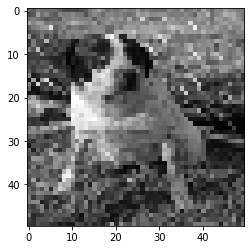

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

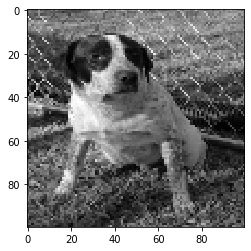

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 5007/5007 [00:17<00:00, 290.32it/s]

9992


In [8]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
1
0
0
0


In [12]:
X = [] # features
y = [] # label

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

[[[[161]
   [149]
   [155]
   ...
   [ 53]
   [ 51]
   [ 49]]

  [[155]
   [142]
   [147]
   ...
   [ 50]
   [ 54]
   [ 51]]

  [[168]
   [162]
   [175]
   ...
   [ 59]
   [ 60]
   [ 59]]

  ...

  [[187]
   [189]
   [189]
   ...
   [ 37]
   [ 44]
   [162]]

  [[177]
   [180]
   [165]
   ...
   [ 34]
   [ 37]
   [152]]

  [[169]
   [179]
   [173]
   ...
   [ 32]
   [ 35]
   [112]]]]


In [13]:
import pickle # pickling is used to store python objects

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Second Section: CNN Implementation

### Implementing the following ConvNet in Tensorflow:
* CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle 

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
X = X/255.0 # normalize the input data, divide the input data by the max value 255 (the max pixel value)

model = Sequential()

# first layer, Conv2D consists of 64 filters and ‘relu’ activation function with kernel size, (3,3)
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu')) # the activation function defines the output of a node given an input
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# fully-connected
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid')) # output


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

# train the model
# batch_size defines number of samples that going to be propagated through the network
# epoch is equal to the number of times the algorithm sees the entire data set

model.fit(X, y, batch_size=32, epochs=1, validation_split=0.1) 

# model.save_weights('first_try.h5')  # you can save your weights after training or during training


Train on 8992 samples, validate on 1000 samples
8992/8992 [==============================] - 197s 22ms/sample - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6934 - val_accuracy: 0.4740


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [18]:
model.save('ConvNet')

W0216 19:23:35.550671 4745678272 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[[1.]]
Cat


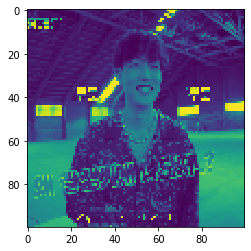

In [22]:
img = "/Users/Layan/Desktop/CNN_Tutorial/test4.jpg"

img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
new_shape = tf.cast(new_shape, tf.float32)
prediction = model.predict(new_shape)
plt.imshow(new_img)

# predict!

print(prediction) # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

# Additional Section: Analyze the Results

## TensorBoard: TensorFlow's visualization toolkit
TensorBoard provides the visualization and tooling needed for machine learning experimentation:
* Tracking and visualizing metrics such as loss and accuracy
* Visualizing the model graph (ops and layers)
* Viewing histograms of weights, biases, or other tensors as they change over time
* Projecting embeddings to a lower dimensional space
* Displaying images, text, and audio data
* Profiling TensorFlow programs
* And much more on: https://www.tensorflow.org/tensorboard/

In [79]:
from tensorflow.keras.callbacks import TensorBoard

NAME = "Cats-vs-dogs-CNN"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [80]:
model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

Train on 6994 samples, validate on 2998 samples
Epoch 1/3
6994/6994 [==============================] - 114s 16ms/sample - loss: 0.2295 - accuracy: 0.9069 - val_loss: 0.6951 - val_accuracy: 0.7215
Epoch 2/3
6994/6994 [==============================] - 126s 18ms/sample - loss: 0.1213 - accuracy: 0.9552 - val_loss: 0.8360 - val_accuracy: 0.7108
Epoch 3/3
6994/6994 [==============================] - 107s 15ms/sample - loss: 0.0510 - accuracy: 0.9881 - val_loss: 1.1079 - val_accuracy: 0.7171


**After having run the previous cell, you should have a new directory called logs. We can visualize the initial results from this directory using tensorboard now.**
- Open a terminal window, change to your working directory 
- Type: "tensorboard --logdir=logs/." You should see a notice like: TensorBoard 1.10.0 at http://localhost:6006/ (Press CTRL+C to quit)
- Open a browser and head to this address. You should see a visualization of the accuracy and the loss.

### That is all
#### Well done!